### Final Project SBA Loan Data
### DSC 630
### Sam Loyd
### November 2020
### FinalProject


#### Data analysis was performed in R Studio in 630Project.r.
#### Model creation, testing and evaluation was performed here.
#### Model Selection and parameter tuning tasks were performed in the following files as appropriate:   
#### * Pycaret_Log - Model selection for loan repayment
#### * Pycaret_Log_Tuning - Model tuning
#### * Pycaret_Reg - Model selection for job creation
#### * Pycaret_Reg_Tuning - Model tuning

In [1]:
# Required libraries
import pandas as pd
import seaborn as sns
import numpy as np
# import matplotlib.pyplot as pt
import sklearn
from scipy.stats import pearsonr
import matplotlib.pyplot as matplotlib
from matplotlib.lines import Line2D
from matplotlib import pyplot
pd.options.display.float_format = '{:.2f}'.format
import seaborn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_ridge import KernelRidge
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
import pylab as pl
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
# from pycaret.regression import *
# from pycaret.classification import *
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
import pickle

In [2]:
raw_sba_df = pd.read_csv("C:\\Users\\Loyd\\Documents\\630Project\\sbapython.csv")
raw_sba_df

,ApprovalFY,Term,NoEmp,CreateJob,GrAppv,SBA_Appv,NewExist_0,NewExist_1,NewExist_2,NewExist_U,...,Bank_4,Bank_5,Bank_6,Bank_7,Bank_8,Bank_9,Bank_10,Bank_11,Bank_12,Bank_13
0,35,84,4,0,60000,48000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,35,60,2,0,40000,32000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,35,180,7,0,287000,215250,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,35,60,2,0,35000,28000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,35,240,14,7,229000,229000,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897105,35,60,6,0,70000,56000,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
897106,35,60,6,0,85000,42500,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
897107,35,108,26,0,300000,225000,0,1,0,0,...,0,0,0,0,1,1,1,1,0,1
897108,35,60,6,0,75000,60000,0,1,0,0,...,0,0,1,1,1,1,0,0,0,1


#### Log transformations proved extremely helpful in predicting the regression target, and had little impact on the classificaton variable.
#### Normalize the data in case some models require it.  Non-gaussian so normalizing instead of standardizing.

In [3]:
# Normalize the data since its non-Gaussian
# scaler = MinMaxScaler() 
# sba_df[['Term','NoEmp','']] = scaler.fit_transform(data)
sba_df = raw_sba_df.copy()
sba_df[['Term','NoEmp','GrAppv','SBA_Appv']] = np.log1p(sba_df[['Term','NoEmp','GrAppv','SBA_Appv']])
sba_df[['ApprovalFY','Term','NoEmp','GrAppv','SBA_Appv']] = minmax_scale(sba_df[['ApprovalFY','Term','NoEmp','GrAppv','SBA_Appv']])

sba_df

,ApprovalFY,Term,NoEmp,CreateJob,GrAppv,SBA_Appv,NewExist_0,NewExist_1,NewExist_2,NewExist_U,...,Bank_4,Bank_5,Bank_6,Bank_7,Bank_8,Bank_9,Bank_10,Bank_11,Bank_12,Bank_13
0,0.65,0.70,0.17,0,0.48,0.51,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.65,0.65,0.12,0,0.43,0.47,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.65,0.82,0.23,0,0.66,0.68,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0.65,0.65,0.12,0,0.42,0.45,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.65,0.86,0.29,7,0.64,0.69,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897105,0.65,0.65,0.21,0,0.50,0.53,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
897106,0.65,0.65,0.21,0,0.52,0.50,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
897107,0.65,0.74,0.36,0,0.67,0.68,0,1,0,0,...,0,0,0,0,1,1,1,1,0,1
897108,0.65,0.65,0.21,0,0.51,0.54,0,1,0,0,...,0,0,1,1,1,1,0,0,0,1


#### Split the data into 60,20,20 Train, Test Validate Sets.

In [4]:
# Create X from the features
X = sba_df.drop(columns=['MIS_logical','CreateJob'])

# Create y from output
y = sba_df[['MIS_logical','CreateJob']]
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

### Model Selction
#### Manual Attempts
#### Base Model Selection for Non Parametric Regressors for combined attempt.
I commented out the code for reference, but left it for review.

There is a fundamental problem. One is a classifier problem and the other is a regression problem.

In [5]:
# RandomForest
# rf = RandomForestRegressor()
# rf.fit(X_train,y_train)

In [6]:
# predictions_rf = rf.predict(X_test)
# r2_score(y_test, predictions_rf)
# 0.24397661457150688
# mean_squared_error(y_test, predictions_rf)
# 32226.813267423066

In [7]:
# DecisionTree
# dt = DecisionTreeRegressor()
# dt.fit(X_train,y_train)

In [8]:
# Worse than the mean
# predictions_dt = dt.predict(X_test)
# r2_score(y_test, predictions_dt)
# -0.318539443208018
# mean_squared_error(y_test, predictions_dt)
# 52987.94040878809

In [9]:
# Chaining the best of the two
# reg = RandomForestRegressor()
# ChainRegression= RegressorChain(reg, order=[0,1])
# ChainRegression.fit(X_train,y_train)

In [10]:
# predictions_ch = ChainRegression.predict(X_test)
# r2_score(y_test, predictions_ch)
# 0.27658581354703804
# mean_squared_error(y_test, predictions_ch)
# 32374.292894349266

## Splitting them out

#### Extremely poor results on CreateJob unit log transforms were applied.

I commented out the code for reference, but left it for review.

In [11]:
# RandomForest
# rfc = RandomForestClassifier()
# rfc.fit(X_train,y_train['MIS_logical'])

In [12]:
# predictions_rfc = rfc.predict(X_test)

In [13]:
# print(classification_report(y_test['MIS_logical'], predictions_rfc))
#               precision    recall  f1-score   support
#
#            0       0.82      0.72      0.77     31473
#            1       0.94      0.97      0.95    147949#
# 
#     accuracy                           0.92    179422
#    macro avg       0.88      0.84      0.86    179422
# weighted avg       0.92      0.92      0.92    179422

In [14]:
# r = RandomForestRegressor()
# r.fit(X_train,y_train['CreateJob'])

In [15]:
# Random Forest is not good at this.
# predictions_rfr = rfr.predict(X_test)
# r2_score(y_test['CreateJob'], predictions_rfr)
# -0.1060937148831047
# mean_squared_error(y_test['CreateJob'], predictions_rfr)
# 64519.687057129435

In [16]:
# neigh = KNeighborsRegressor(n_neighbors=20)
# neigh.fit(X_train, y_train['CreateJob'])

In [17]:
# predictions_neigh = neigh.predict(X_test)
# r2_score(y_test['CreateJob'], predictions_neigh)
# 0.017379498790345727

In [18]:
# mean_squared_error(y_test['CreateJob'], predictions_neigh)
# 62113.263133492546

# Create Job Section

### Model selection with Pycaret.

From here I turned to pycaret to help me with model selection. It was a lot faster and easier to code. 
To look at that code, please see Pycaret_Reg and Pycaret_Cat. I split it off due to long run times.


### Feature Selection 

#### Regression for CreateJob

In [19]:
# Split sets for feature selection
np.set_printoptions(suppress=True)
all_features=X_train
target = y_train['CreateJob']
modelreg = LGBMRegressor(verbose=0)
modelreg.fit(all_features,target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMRegressor(verbose=0)

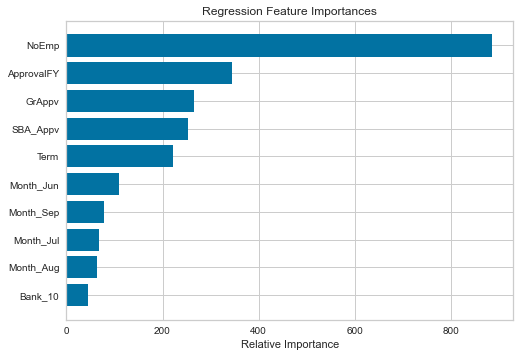

In [20]:
# Graph what the model found
features = all_features.columns
importances = modelreg.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Regression Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [21]:
# Make predictions using test
predictions_reg = modelreg.predict(X_test)
mae = metrics.mean_absolute_error(y_test['CreateJob'], predictions_reg)
mse = metrics.mean_squared_error(y_test['CreateJob'], predictions_reg)
rmse = np.sqrt(mse) # or mse**(0.5)

# back = np.expm1(Y)

# y_test['CreateJob'] = np.expm1(y_test['CreateJob'])
# predictions_reg = np.expm1(predictions_reg)

r2 = r2_score(y_test['CreateJob'], predictions_reg)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 2.40551367231773
MSE: 508.0846064142112
RMSE: 22.540732162336944
R-Squared: 0.9912896479289183


In [22]:
# Grab all greater than .1
cnt = 0
feature_list = []
for i in features:
    # print(i)
    # print(importances[cnt])
    if importances[cnt] > 0.1:
        # print("*")
        feature_list.append(i)
    cnt += 1    

In [23]:
print(feature_list)

['ApprovalFY', 'Term', 'NoEmp', 'GrAppv', 'SBA_Appv', 'NewExist_0', 'NewExist_1', 'NewExist_2', 'UrbanRural_0', 'UrbanRural_1', 'UrbanRural_2', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'RevLineCr_3', 'RevLineCr_4', 'FranchiseCode_2', 'FranchiseCode_3', 'FranchiseCode_4', 'FranchiseCode_5', 'FranchiseCode_8', 'FranchiseCode_9', 'FranchiseCode_10', 'FranchiseCode_11', 'FranchiseCode_12', 'LowDoc_2', 'LowDoc_3', 'LowDoc_4', 'NAICS_2', 'NAICS_3', 'NAICS_4', 'NAICS_5', 'NAICS_6', 'NAICS_7', 'NAICS_8', 'NAICS_9', 'NAICS_10', 'NAICS_11', 'Bank_2', 'Bank_3', 'Bank_4', 'Bank_5', 'Bank_6', 'Bank_7', 'Bank_8', 'Bank_9', 'Bank_10', 'Bank_11', 'Bank_12', 'Bank_13']


In [24]:
# Retrain with new feature selection
np.set_printoptions(suppress=True)
all_features=X_train[(feature_list)]
target = y_train['CreateJob']
modelreg = LGBMRegressor(verbose=0)
modelreg.fit(all_features,target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMRegressor(verbose=0)

In [25]:
# Make predictions using test
predictions_reg = modelreg.predict(X_test[(feature_list)])
mae = metrics.mean_absolute_error(y_test['CreateJob'], predictions_reg)
mse = metrics.mean_squared_error(y_test['CreateJob'], predictions_reg)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test['CreateJob'], predictions_reg)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 2.40551367231773
MSE: 508.0846064142112
RMSE: 22.540732162336944
R-Squared: 0.9912896479289183


In [26]:
reg_feature_list = feature_list

### Parameter Tunting

##### Found with PyCaret. See Pycaret_Reg_Tuning for explanation of parameter selection

In [27]:
# Retrain with new feature selection
np.set_printoptions(suppress=True)
all_features=X_train[(feature_list)]
target = y_train['CreateJob']
modelreg = LGBMRegressor(verbose=0,learning_rate=.1, n_estimators=90, num_leaves=80,min_child_samples=15)
modelreg.fit(all_features,target)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMRegressor(min_child_samples=15, n_estimators=90, num_leaves=80, verbose=0)

In [28]:
# Make predictions using test
predictions_reg = modelreg.predict(X_test[(feature_list)])
mae = metrics.mean_absolute_error(y_test['CreateJob'], predictions_reg)
mse = metrics.mean_squared_error(y_test['CreateJob'], predictions_reg)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = r2_score(y_test['CreateJob'], predictions_reg)

print("Results:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results:
MAE: 2.3540506551031712
MSE: 475.65490820305814
RMSE: 21.809514167056957
R-Squared: 0.9918456066913213


In [29]:
# Adjusted R2
score = r2
#Adjusted RSquared of the model
n=len(y_test) #number of records
p=len(feature_list)#number of features .i.e. columns excluding uniqueId and target variable
adjr= 1-(1-score)*(n-1)/(n-p-1)
print("Adjusted R-Squared", adjr)

Adjusted R-Squared 0.99184296983304


### Validations 

In [30]:
# Validation data set

# Make predictions using test
predictions_val_reg = modelreg.predict(X_val[(feature_list)])
vmae = metrics.mean_absolute_error(y_val['CreateJob'], predictions_val_reg)
vmse = metrics.mean_squared_error(y_val['CreateJob'], predictions_val_reg)
vrmse = np.sqrt(vmse) # or mse**(0.5)  
vr2 = r2_score(y_val['CreateJob'], predictions_val_reg)

print("Results:")
print("MAE:",vmae)
print("MSE:", vmse)
print("RMSE:", vrmse)
print("R-Squared:", vr2)

Results:
MAE: 2.4166381746018883
MSE: 1104.4532147510104
RMSE: 33.23331483242396
R-Squared: 0.9811106927010818


In [31]:
# Adjusted R2
vscore = vr2
#Adjusted RSquared of the model
n=len(y_val) #number of records
p=len(feature_list)#number of features .i.e. columns excluding uniqueId and target variable
adjr= 1-(1-vscore)*(n-1)/(n-p-1)
print("Adjusted R-Squared",adjr)

Adjusted R-Squared 0.9811045845303702


In [32]:
# Save the model as a pickle file
filename = 'regr_jobscreated_model.pickle'
pickle.dump(modelreg, open(filename, 'wb'))

# MIS_logical Section

### Feature Selection 

#### Categorical for MIS_logical 

In [33]:
# Split sets for feature selection
np.set_printoptions(suppress=True)
# Actually dropped overall accuracy 
all_features=X_train.drop(columns=['ApprovalFY'])
target = y_train['MIS_logical']
modelclass = CatBoostClassifier(verbose=0)
modelclass.fit(all_features,target)

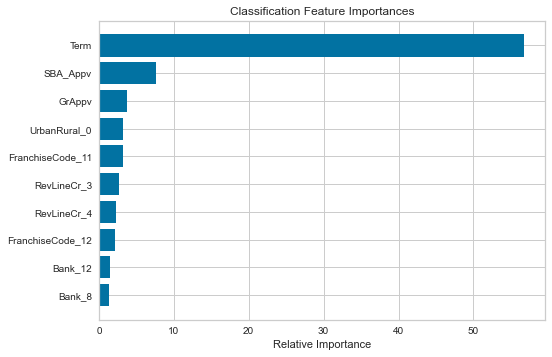

In [34]:
# Graph what the model found
features = all_features.columns
importances = modelclass.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Classification Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [35]:
predictions_class = modelclass.predict(X_test)

In [36]:
print(classification_report(y_test['MIS_logical'], predictions_class))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84     31473
           1       0.96      0.97      0.97    147949

    accuracy                           0.95    179422
   macro avg       0.91      0.90      0.91    179422
weighted avg       0.95      0.95      0.95    179422



In [37]:
# Grab all greater than .1
cnt = 0
feature_list = []
for i in features:
    # print(i)
    # print(importances[cnt])
    if importances[cnt] > .1:
        # print("*")
        feature_list.append(i)
    cnt += 1   

In [38]:
print(feature_list)

['Term', 'NoEmp', 'GrAppv', 'SBA_Appv', 'NewExist_1', 'NewExist_2', 'UrbanRural_0', 'UrbanRural_1', 'UrbanRural_2', 'RevLineCr_2', 'RevLineCr_3', 'RevLineCr_4', 'FranchiseCode_6', 'FranchiseCode_8', 'FranchiseCode_10', 'FranchiseCode_11', 'FranchiseCode_12', 'LowDoc_3', 'LowDoc_4', 'NAICS_2', 'NAICS_3', 'NAICS_4', 'NAICS_5', 'NAICS_6', 'NAICS_7', 'NAICS_8', 'NAICS_9', 'NAICS_10', 'NAICS_11', 'Bank_2', 'Bank_3', 'Bank_4', 'Bank_5', 'Bank_6', 'Bank_7', 'Bank_8', 'Bank_9', 'Bank_10', 'Bank_11', 'Bank_12', 'Bank_13']


In [39]:
# Retrain with feature selection
np.set_printoptions(suppress=True)
all_features=X_train[(feature_list)]
target = y_train['MIS_logical']
modelclass = CatBoostClassifier(verbose=0)
modelclass.fit(all_features,target)

In [40]:
predictions_class = modelclass.predict(X_test)

In [41]:
print(classification_report(y_test['MIS_logical'], predictions_class))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     31473
           1       0.96      0.97      0.97    147949

    accuracy                           0.95    179422
   macro avg       0.91      0.90      0.91    179422
weighted avg       0.95      0.95      0.95    179422



In [42]:
auc = metrics.roc_auc_score(y_test['MIS_logical'], predictions_class)
auc = round(auc,2)
print('AUC: %.2f' % auc)

AUC: 0.90


### Parameter Tuning 
##### Found with PyCaret. See Pycaret_Log_Tuning for explanation of parameter selection.

In [43]:
# Note the improvement in AUC
modelclass = CatBoostClassifier(verbose=0,scale_pos_weight=.23)
modelclass.fit(all_features,target)

In [44]:
predictions_class = modelclass.predict(X_test)

In [45]:
print(classification_report(y_test['MIS_logical'], predictions_class))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83     31473
           1       0.98      0.93      0.96    147949

    accuracy                           0.93    179422
   macro avg       0.86      0.93      0.89    179422
weighted avg       0.94      0.93      0.93    179422



In [46]:
auc = metrics.roc_auc_score(y_test['MIS_logical'], predictions_class)
auc = round(auc,2)
print('AUC: %.2f' % auc)

AUC: 0.93


[Text(0, 0.5, 'Default'), Text(0, 1.5, 'Paid')]

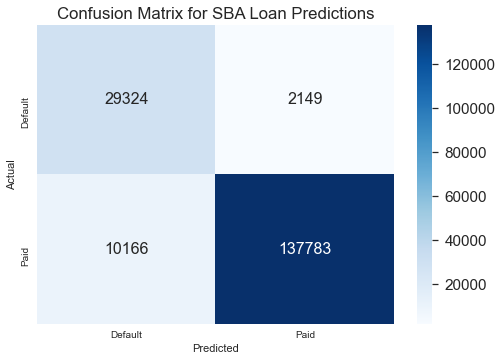

<Figure size 720x504 with 0 Axes>

In [47]:
data = confusion_matrix(y_test['MIS_logical'], predictions_class)
ax= plt.subplot()

df_cm = pd.DataFrame(data, columns=np.unique(y_test['MIS_logical']), index = np.unique(y_test['MIS_logical']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,ax = ax, annot_kws={"size": 16},fmt='d')# font size
ax.set_title('Confusion Matrix for SBA Loan Predictions') 
ax.xaxis.set_ticklabels(['Default', 'Paid'])   
ax.yaxis.set_ticklabels(['Default', 'Paid'])


In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test['MIS_logical'], predictions_class)

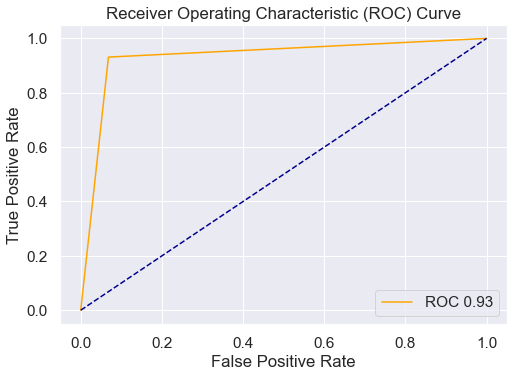

In [49]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC '+ str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve' )
    plt.legend(frameon=True)
    plt.show()

plot_roc_curve(fpr, tpr)

### Validations

In [50]:
predictions_val_class = modelclass.predict(X_val)

In [51]:
print(classification_report(y_val['MIS_logical'], predictions_val_class))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83     31392
           1       0.98      0.93      0.96    148030

    accuracy                           0.93    179422
   macro avg       0.86      0.93      0.89    179422
weighted avg       0.94      0.93      0.93    179422



In [52]:
vauc = metrics.roc_auc_score(y_val['MIS_logical'], predictions_val_class)
vauc = round(vauc,2)
print('AUC: %.2f' % vauc)

AUC: 0.93


In [53]:
# Save the model as a pickle file
filename = 'class_loanrepay_model.pickle'
pickle.dump(modelclass, open(filename, 'wb'))